In [1]:
import os
import json
import io
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pyarrow.parquet as pq

import cv2
from PIL import Image

from ultralytics import YOLO

## Constants and Stuff

In [2]:
TOP_LEVEL_PREFIX = "/home/012392471@SJSUAD/master_project/data/waymo"

In [3]:
SPLIT = "training/"

In [4]:
CAMERA_IMAGE_PREFIX = os.path.join(TOP_LEVEL_PREFIX, SPLIT, "camera_image")

In [5]:
IMAGE_ANNOTATIONS_PREFIX = os.path.join(TOP_LEVEL_PREFIX, SPLIT, "camera_box")

In [6]:
STATS_PREFIX = os.path.join(TOP_LEVEL_PREFIX, SPLIT, "stats")

In [7]:
CUR_INDEX = 0

## Helpers

In [8]:
def pq_dataframe_to_image(df):
    image_binary = df["[CameraImageComponent].image"]
    image = Image.open(io.BytesIO(image_binary))
    return image

In [9]:
def cxcywh2xywh(cx, cy, w, h):
    dx, dy = math.floor(w/2), math.floor(h/2)

    x, y = cx - dx, cy - dy

    return (x, y, w, h)

In [10]:
def xywh2xyxy(bbox):   
    x1, y1, w, h = bbox
    
    x2, y2 = x1 + w, y1 + h

    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

    return (x1, y1, x2, y2)

## File Loaders

In [11]:
def load_image(index, frame_number):
    images = os.listdir(CAMERA_IMAGE_PREFIX)
    test_pq_image = os.path.join(CAMERA_IMAGE_PREFIX, images[index])
    print("Image: ", test_pq_image)
    
    pq_image = pq.read_table(test_pq_image)
    
    df = pq_image.to_pandas()
    df = df.iloc[frame_number]
    return df

In [12]:
def load_annotations(index, timestamp):
    labels = os.listdir(IMAGE_ANNOTATIONS_PREFIX)
    pq_image_label = os.path.join(IMAGE_ANNOTATIONS_PREFIX, labels[index])
    print("Annotation: ", pq_image_label)
    
    pq_label = pq.read_table(pq_image_label)

    df = pq_label.to_pandas()
    return df.loc[df["key.frame_timestamp_micros"] == timestamp]

In [13]:
def load_stats(index):
    stats = os.listdir(STATS_PREFIX)
    test_pq_stat_filepath = os.path.join(STATS_PREFIX, stats[index])
    print("Stats: ", test_pq_stat_filepath)

    test_pq_stats = pq.read_table(test_pq_stat_filepath)
    df_stats = test_pq_stats.to_pandas()
    df_stats.loc[df["key.frame_timestamp_micros"] == timestamp]

## Loading in Data

In [14]:
image_df = load_image(index=CUR_INDEX, frame_number=0)
image_df

Image:  /home/012392471@SJSUAD/master_project/data/waymo/training/camera_image/10023947602400723454_1120_000_1140_000.parquet


key.segment_context_name                                                             10023947602400723454_1120_000_1140_000
key.frame_timestamp_micros                                                                                 1552440195362591
key.camera_name                                                                                                           1
[CameraImageComponent].image                                              b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
[CameraImageComponent].pose.transform                                     [0.6990588408049747, 0.7150334085392328, 0.006...
[CameraImageComponent].velocity.linear_velocity.x                                                                  1.337475
[CameraImageComponent].velocity.linear_velocity.y                                                                 -1.359002
[CameraImageComponent].velocity.linear_velocity.z                                                                  0.027288
[CameraI

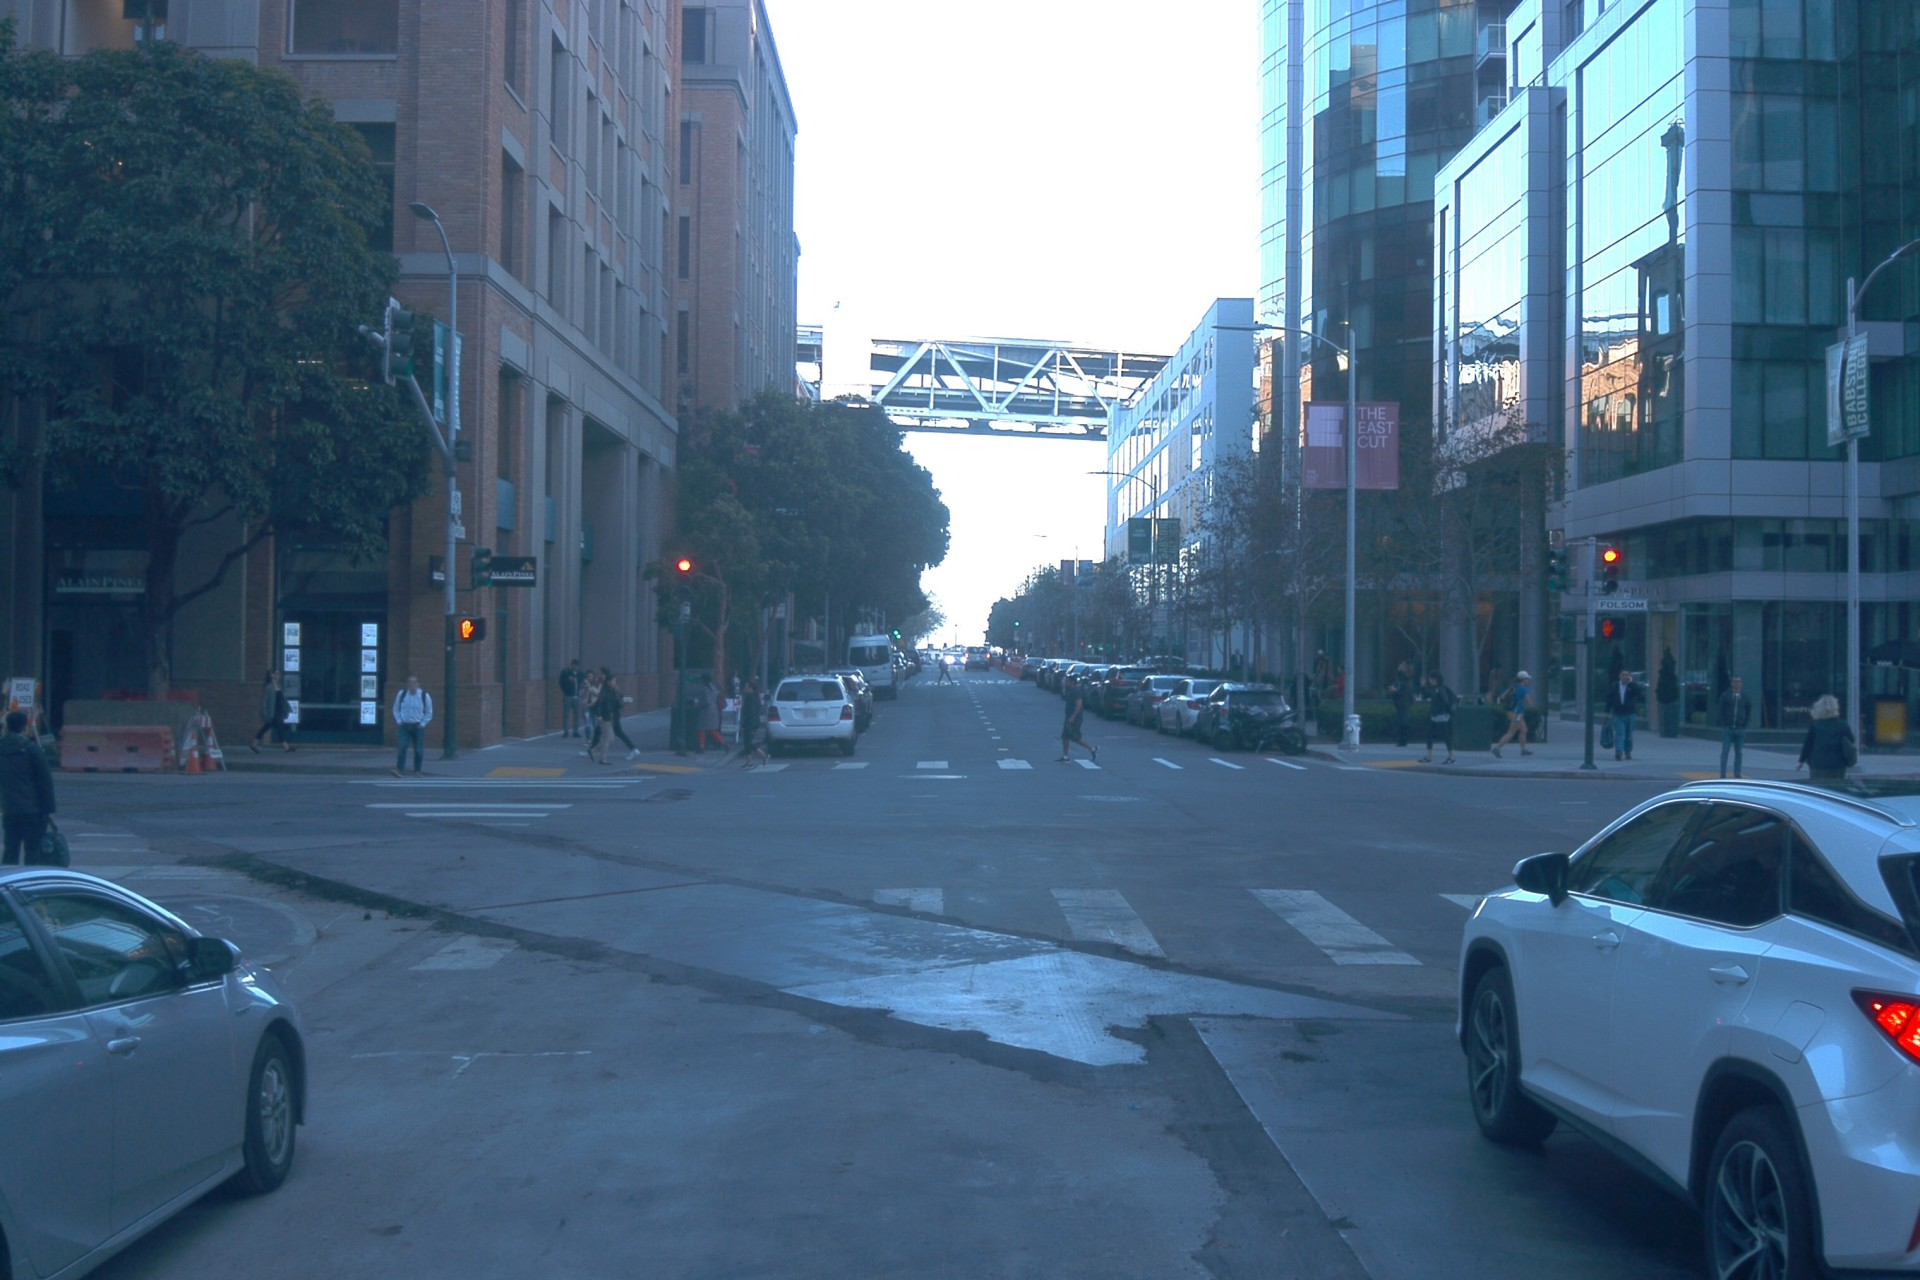

In [15]:
image = pq_dataframe_to_image(image_df)
image

In [16]:
timestamp = image_df["key.frame_timestamp_micros"]

In [17]:
annotations = load_annotations(index=CUR_INDEX, timestamp=timestamp)
annotations.head()

Annotation:  /home/012392471@SJSUAD/master_project/data/waymo/training/camera_box/10023947602400723454_1120_000_1140_000.parquet


,key.segment_context_name,key.frame_timestamp_micros,key.camera_name,key.camera_object_id,[CameraBoxComponent].box.center.x,[CameraBoxComponent].box.center.y,[CameraBoxComponent].box.size.x,[CameraBoxComponent].box.size.y,[CameraBoxComponent].type,[CameraBoxComponent].difficulty_level.detection,[CameraBoxComponent].difficulty_level.tracking
index,,,,,,,,,,,
10023947602400723454_1120_000_1140_000;1552440195362591,10023947602400723454_1120_000_1140_000,1552440195362591,1,02f3a769-021f-49b0-b954-18e4fa1d5fde,900.01575,665.69586,13.89498,22.73724,1,2.0,2.0
10023947602400723454_1120_000_1140_000;1552440195362591,10023947602400723454_1120_000_1140_000,1552440195362591,1,0611ea50-f652-406d-942a-9ec7e3e90546,1303.60176,697.90695,29.05314,54.94833,2,NaN,NaN
10023947602400723454_1120_000_1140_000;1552440195362591,10023947602400723454_1120_000_1140_000,1552440195362591,1,08b1e19e-b912-4963-a7bb-55e138bbc25e,1828.45305,741.48666,67.58013,99.15963,2,NaN,NaN
10023947602400723454_1120_000_1140_000;1552440195362591,10023947602400723454_1120_000_1140_000,1552440195362591,1,11165fc3-e936-4722-9257-1574c6752eab,951.17454,658.74837,13.89498,15.78975,1,2.0,2.0
10023947602400723454_1120_000_1140_000;1552440195362591,10023947602400723454_1120_000_1140_000,1552440195362591,1,24508c28-3154-4b7f-964d-70b3ed7d5a9d,608.85276,715.59147,67.58013,99.15963,2,NaN,NaN


## Running Predictions

In [18]:
model = YOLO('../weights/yolo11m.pt')

In [19]:
results = model(image)
results[0]


0: 448x640 15 persons, 12 cars, 1 bus, 1 truck, 4 traffic lights, 45.8ms
Speed: 1.9ms preprocess, 45.8ms inference, 304.4ms postprocess per image at shape (1, 3, 448, 640)


ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

car :  0.9387922286987305
car :  0.9349325299263
car :  0.805128276348114
person :  0.7999653816223145
person :  0.781808614730835
car :  0.749040424823761
person :  0.7362898588180542
person :  0.6988832950592041
person :  0.6786165833473206
person :  0.6442543864250183
person :  0.6358495354652405
car :  0.6300910115242004
car :  0.5877418518066406
car :  0.5848955512046814
traffic light :  0.558009922504425
traffic light :  0.5201771259307861
person :  0.5073217749595642
person :  0.4997568130493164
person :  0.4934355616569519
person :  0.4722684621810913
person :  0.4692908525466919
car :  0.4467155635356903
person :  0.4308038055896759
person :  0.41461285948753357
traffic light :  0.33491840958595276
truck :  0.32368963956832886
person :  0.3225012719631195
car :  0.3116428554058075
car :  0.3046116530895233
car :  0.2671218514442444
car :  0.264187216758728
traffic light :  0.2573474645614624
bus :  0.2550409436225891


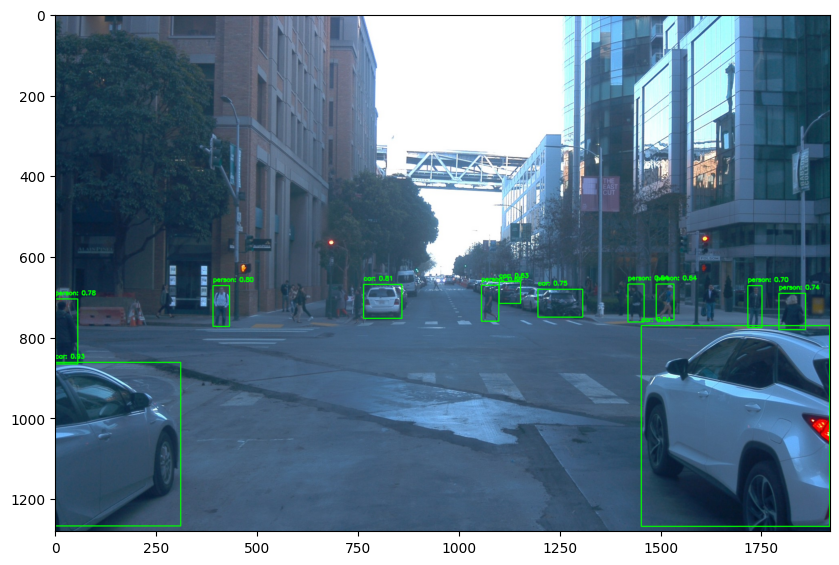

In [20]:
np_im = np.array(image)
        
for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy.tolist()[0])
    class_id = int(box.cls)
    class_name = results[0].names[class_id]
    confidence = box.conf.item()

    print(class_name, ": ", confidence)
    
    if confidence < 0.6:
        continue
        
    # Draw rectangle and label on the frame
    cv2.rectangle(np_im, (x1, y1), (x2, y2), (0, 255, 0), 2)
    label = f"{class_name}: {confidence:.2f}"
    cv2.putText(np_im, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

plt.figure(figsize=(10, 8))
plt.imshow(np_im)

In [26]:
np_im2 = np.array(image)

for i in range(annotations.shape[0]):
    ann = annotations.iloc[i]

    if ann["key.frame_timestamp_micros"] != timestamp:
        continue

    print(ann)
    print()

#     cx, cy = ann["[CameraBoxComponent].box.center.x"], ann["[CameraBoxComponent].box.center.y"]
#     h, w = ann["[CameraBoxComponent].box.size.x"], ann["[CameraBoxComponent].box.size.y"]

#     bbox = cxcywh2xywh(cx, cy, h, w)
#     x1, y1, x2, y2 = xywh2xyxy(bbox)

#     cv2.rectangle(np_im2, (x1, y1), (x2, y2), (0, 255, 0), 2)
#     cv2.putText(np_im2, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# plt.figure(figsize=(10, 8))
# plt.imshow(np_im2)

key.segment_context_name                           10023947602400723454_1120_000_1140_000
key.frame_timestamp_micros                                               1552440195362591
key.camera_name                                                                         1
key.camera_object_id                                 02f3a769-021f-49b0-b954-18e4fa1d5fde
[CameraBoxComponent].box.center.x                                               900.01575
[CameraBoxComponent].box.center.y                                               665.69586
[CameraBoxComponent].box.size.x                                                  13.89498
[CameraBoxComponent].box.size.y                                                  22.73724
[CameraBoxComponent].type                                                               1
[CameraBoxComponent].difficulty_level.detection                                       2.0
[CameraBoxComponent].difficulty_level.tracking                                        2.0
Name: 1002